# **Project 3: GapMinder Data**

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay, mean_absolute_error, mean_squared_error

## Part 1: Regression Analysis of GapMinder Data

In [2]:
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1: Scatter Plot of Life Expectancy across Time

Text(0.5, 1.0, 'Life Expectancy Over Time')

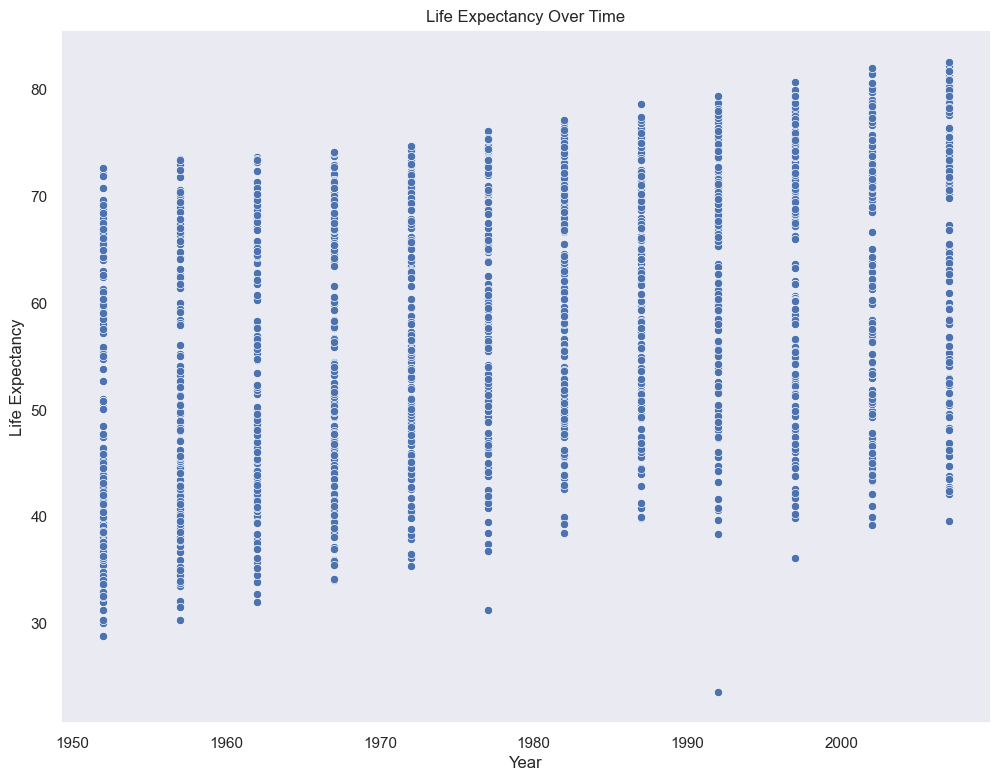

In [7]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x='year', y='lifeExp', data=data, ax=ax)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')

### Question 1: Life Expectancy Trends From Scatter Plot

As one would expect, the average life expectancy increases from 1952 to 2007. The trend appears to be linear, but this plot does not completely confirm that hypothesis. From about 1980 to 2007, the values take on a slight s-shape which suggests the data might not be too linear. Also, we are generalizing every country into one data point so it does not truly capture the essence of the data.

### Question 2: Life Expectancy Distribution Trends From Violin Plot

**Violin Plot of Life Expectancy Over Time**

A good way to better visualize the data is through a violin plot. It allows us to get a better look at how life expectancy is distributed across each year. I collected the arrays of life expectancy values for each year into a list **life_exp_per_year**. 

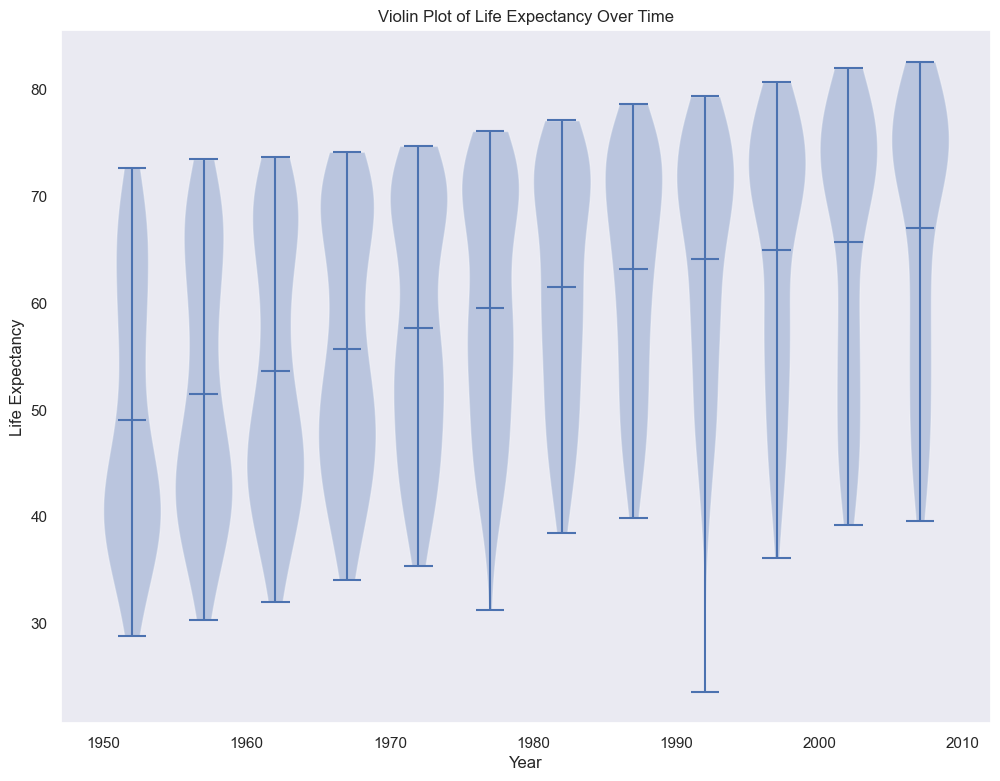

In [16]:
life_exp_per_year = []

# Go through each unique year and append the life expectancy values for the year
for year in data['year'].unique():
    life_exp = data[data['year'] == year]['lifeExp'].values
    life_exp_per_year.append(life_exp)

fig, ax = plt.subplots(figsize=(12, 9))

ax.violinplot(life_exp_per_year, data['year'].unique(), widths=4, showmeans=True)

ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot of Life Expectancy Over Time")

# Show the plot
plt.show()

The distribution of life expectancy across countries for individual years is positively skewed for the years above 1977. This is shown in the violin plot by the greater width towards the upper tails of each year. While many of the years appear to be unimodal, some of the years between 1960 and 1980 appear to be bimodal. The data is not symmetric around it's center, as evidenced by the varying widths above and below the center for nearly all of the years.

### Question 3: Linear Regression Model Prediction

Based on the violin plot above, I would 

### Question 4:

### Question 5:

### Exercise 2: Linear Regression Model for Life Expectancy vs. Year

In [9]:
lin_model = LinearRegression()

X = data[['year']]
y = data['lifeExp']

# Fit the model to the data
lin_model.fit(X, y)
y_pred = lin_model.predict(X)

# Print the fitted model
print("Intercept: " + str(lin_model.intercept_))
print("Slope: " + str(lin_model.coef_[0]))

Intercept: -585.6521874415448
Slope: 0.3259038276371518


### Question 6: Life Expectancy Increase Per Year

The increase in life expectancy per year is simply the slope or coefficient of the linear regression model we displayed above. For every year increase, we expect the life expectancy to increase by **0.326 years**. 

### Question 7: Examining Null Hypothesis

In order to reject or accept the null hypothesis of no relationship between year and life expectancy, let's look at some different statistics. First off, we can calculate the mean absolute error. This tells us far off our predictions are from the true values of life expectancy.

In [10]:
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error: " + str(mae))

Mean Absolute Error: 10.129243588919346


The MAE is about 10 years. On average, our prediction for a country's life expectancy is 10 years from the actual value. This is quite a high error, so it would suggest that there is no relationship between life expectancy and years. But, we can do some more in-depth tests.

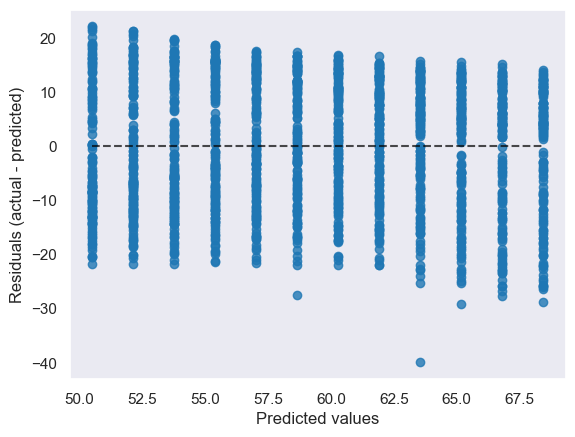

In [13]:
display = PredictionErrorDisplay(y_true=y, y_pred=y_pred)
display.plot()
plt.show()

### Exercise 3: Violin Plot of Residuals vs. Year

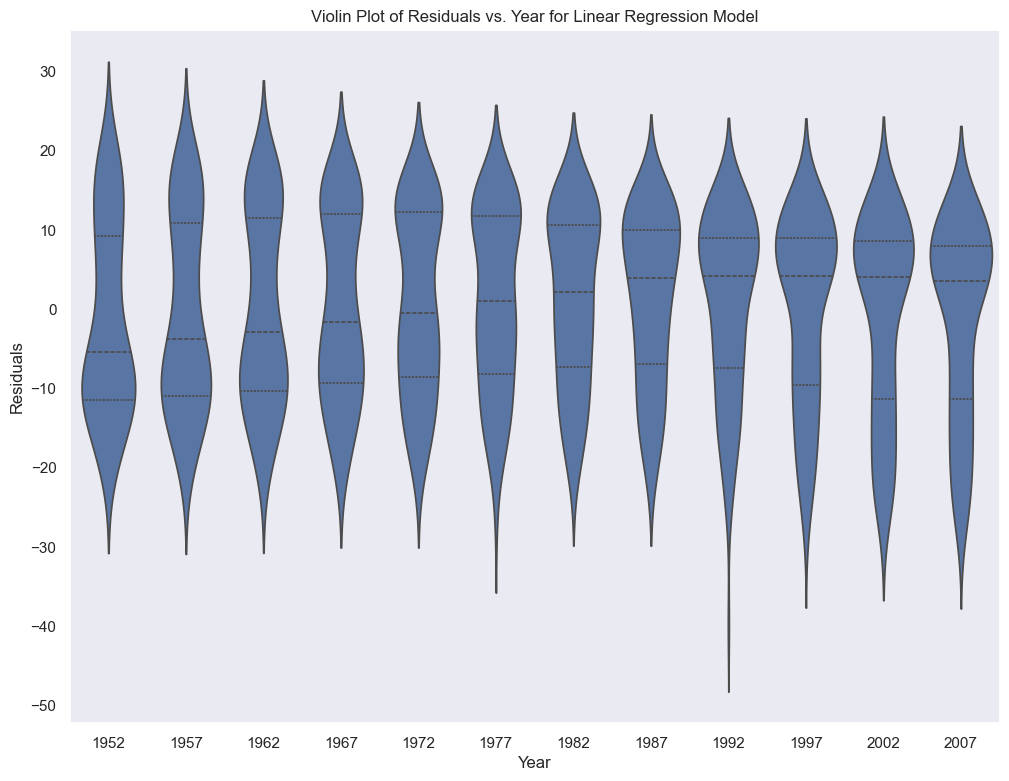

In [18]:
residuals = y - y_pred

temp_df = pd.DataFrame({'Year': data['year'], 'Residuals': residuals})

fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(x='Year', y='Residuals', data=temp_df, ax=ax, inner='quartile')
ax.set_xlabel("Year")
ax.set_ylabel("Residuals")
ax.set_title("Violin Plot of Residuals vs. Year for Linear Regression Model")
plt.show()
